<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-2</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 6: Algoritmos Cuánticos IV</font></td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

## Contenido

1. [Introducción](#1)
2. [Quantum Fourier Transform (QFT)](#2)
   1. [Discrete Fourier Transform](#2.1)
   2. [Quantum Fourier Transform](#2.2)
   3. [Implementación del Circuito](#2.3)
   4. [Implementación en Qiskit](#2.4)
   5. [QFT Inversa](#2.5)
3. [Quantum Phase Estimation](#3)
   1. [Algoritmo de QPE](#3.1)
   2. [Implementación en Qiskit](#3.2)
4. [Práctica 6](#4)

<a id="1"></a>
# 1. Introducción

El **algoritmo de Shor** es uno de los algoritmos más conocidos en computación cuántica debido a su capacidad para factorizar números enteros de manera eficiente, una tarea que es computacionalmente difícil para las computadoras clásicas. La factorización eficiente tiene importantes implicaciones en áreas como la **criptografía**, ya que muchos sistemas de seguridad se basan en la dificultad de factorizar números grandes.

Este algoritmo combina técnicas cuánticas y clásicas para resolver el problema de factorización. Sin embargo, para entender y ejecutar el algoritmo de Shor, es necesario conocer varios conceptos fundamentales y subrutinas. Estos componentes forman la base del algoritmo y se utilizan en diferentes etapas del proceso de factorización.

A continuación, se presenta el **diagrama de bloques del algoritmo de Shor**. Este diagrama ilustra cómo está estructurado el algoritmo, destacando las principales subrutinas y bloques de procesamiento clásico y cuántico:

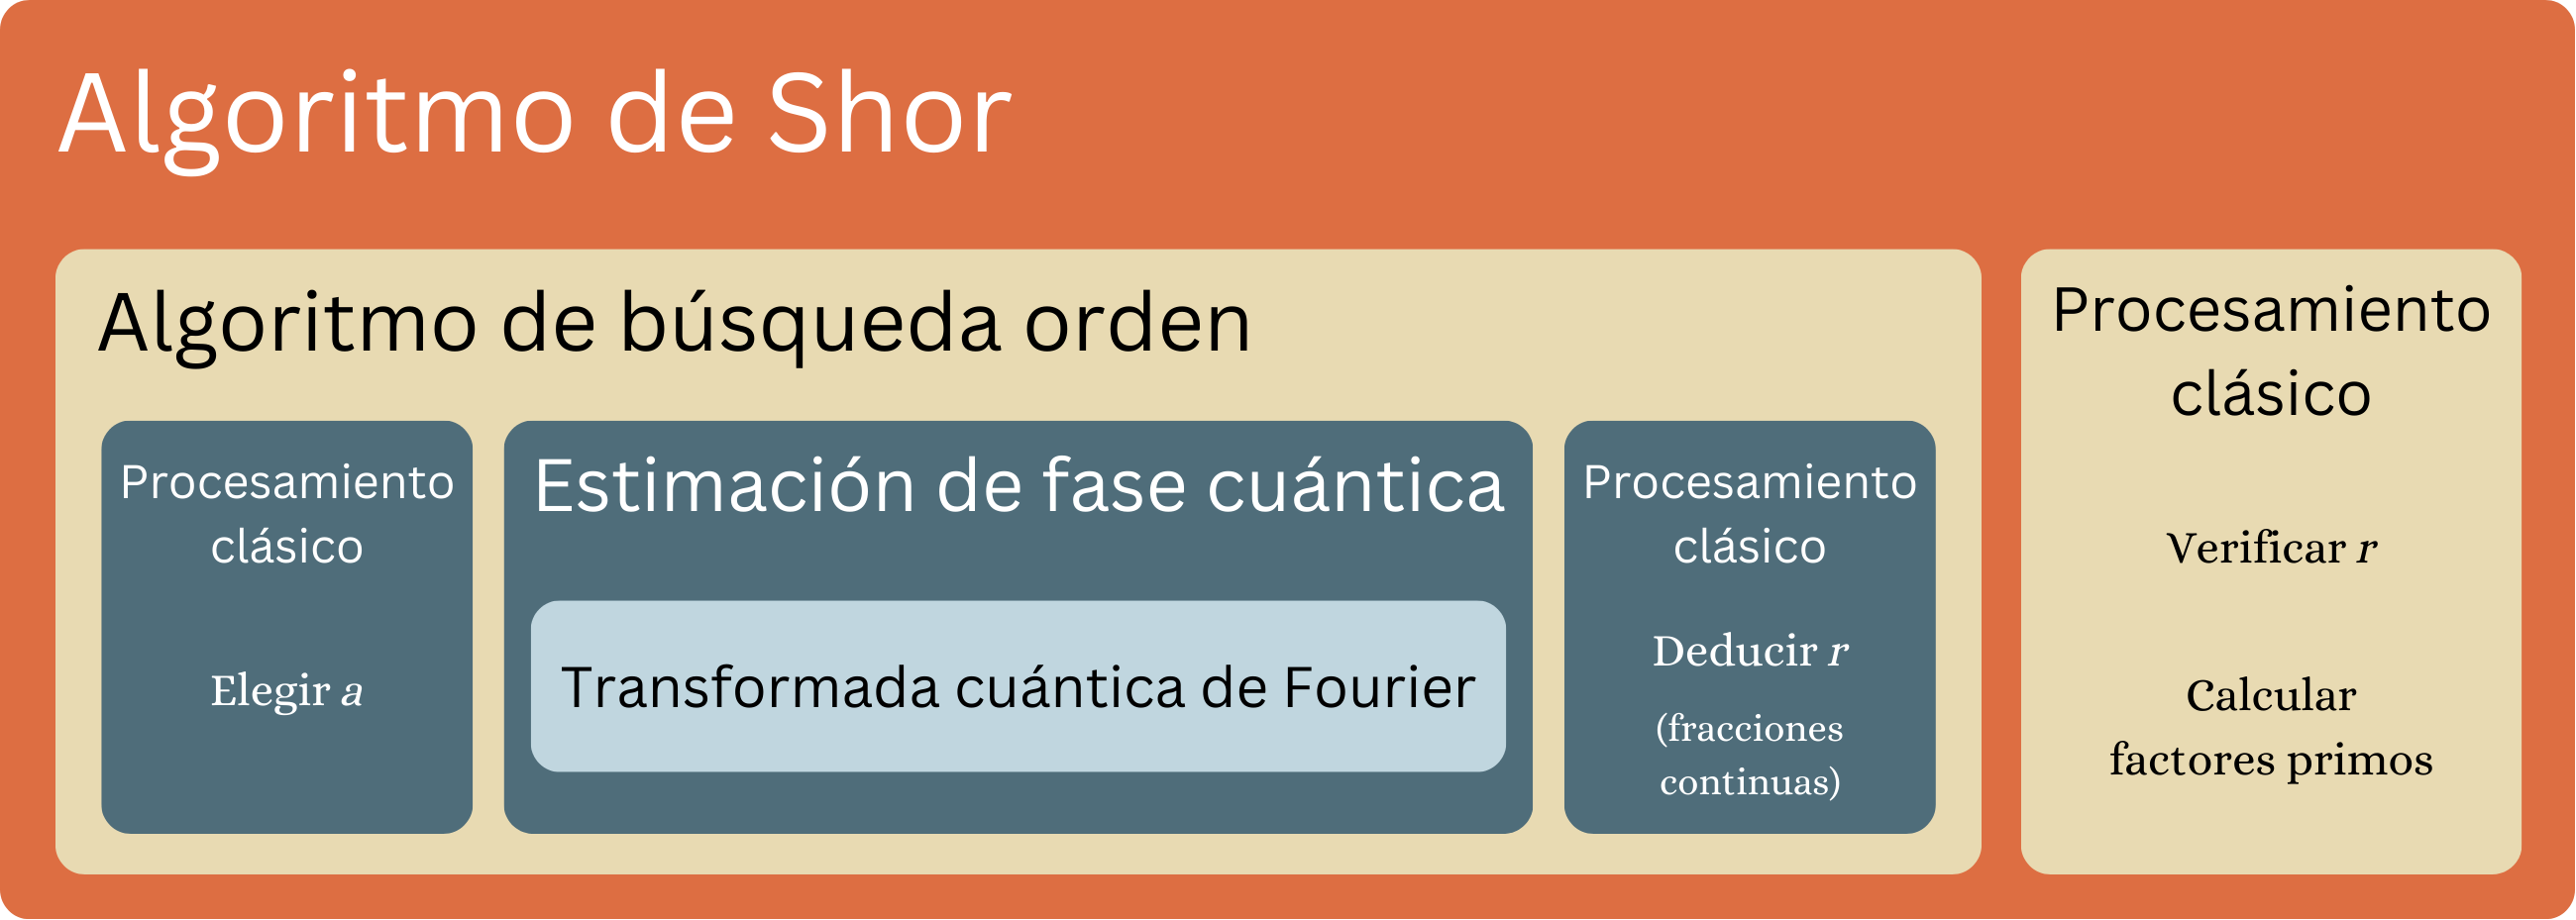

- **Transformada Cuántica de Fourier (QFT)**: Es una subrutina cuántica utilizada para obtener información sobre las fases.
- **Estimación de Fase Cuántica (QPE)**: Utiliza la QFT para estimar la fase de un operador unitario, lo cual es crucial en la búsqueda de órdenes.
- **Algoritmo de Búsqueda de Orden**: Esta es la parte cuántica central del algoritmo de Shor. Utiliza QPE para encontrar el periodo u _orden_ de una función, que es clave para la factorización.
- **Procesamiento Clásico**: El algoritmo de Shor también requiere bloques de procesamiento clásico. Estos bloques se encargan de la preparación inicial (como la elección de parámetros), la interpretación de los resultados cuánticos, y finalmente la verificación y cálculo de los factores primos.

Este diagrama refleja el orden de construcción que seguiremos en los siguientes dos notebooks, desde los componentes más internos (como la $QFT$) hasta el conjunto completo del algoritmo de Shor.

<a id="2"></a>
# 2. Quantum Fourier Transform ($QFT$)

Las transformaciones son muy populares en matemáticas y ciencias de la computación. Ayudan a *transformar* un problema en otro problema cuya solución se conoce.

Lo que hace especial a la Transformada de Fourier es que se puede calcular **más rápido en una computadora cuántica que en una computadora clásica**.

Primero veamos la versión clásica: $DFT$, ya que nos ayudará a entender mejor la versión cuántica: $QFT$.

<a id="2.1"></a>
## 2.1. Discrete Fourier Transform

La **Transformda Discreta de Fourier** (Discrete Fourier Transform, $DFT$) de un vector $\vec{x}=\pmatrix{x_0~x_1\dots~x_{N-1}}^T$ es el vector complejo $\vec{y}=\pmatrix{y_0~y_1\dots y_{N-1}}^T$ donde

$$
y_k=\frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}{\large e}^{\huge \frac{2\pi i j k }{N}}x_j
$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 

$$ $$
Dado $\vec{x}=\pmatrix{1\\2}$ transformarlo con DFT para obtener $\vec{y}$.

Cuando $k=0$:

$$
y_0=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}{\large e}^{\huge\frac{2\pi ij\cdot 0}{2} }x_j= \frac{1}{\sqrt{2}}  (x_0+x_1) = \frac{3}{\sqrt{2}}
$$

Cuando $k=1$:

$$
y_1=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}{\large e}^{\huge\frac{2\pi ij\cdot 1}{2}}x_j= \frac{1}{\sqrt{2}} \biggl( {\large e}^{\huge\frac{2\pi i \cdot0 \cdot1}{2}} x_0 +  {\large e}^{\huge\frac{2\pi i \cdot 1 \cdot 1}{2}} x_1 \biggr)  = \frac{1+  2{\large e}^{\huge\pi i}}{\sqrt{2}}=\frac{-1}{\sqrt{2}}.
$$

Entonces,

$$\vec{y}=\pmatrix{\dfrac{3}{\sqrt{2}} \\ \dfrac{-1}{\sqrt{2}}}$$

**$DFT$ identifica periodos en los datos**. Veamos un ejemplo:

Vamos a crear la siguiente lista en Python `[1 0 0 0 0 1 0 0 0 0 ... 1 0 0 0 0]` de longitud $N=100$ donde cada 5to valor (periodo $r$) es igual a $1$ y el resto son ceros.

Luego calcularemos su $DFT$ usando Python y graficaremos el comportamiento del resultado.

In [ ]:
x = []                    # creamos una lista vacía

N = 100                   # número de elementos en la lista
                          # este N no está restringido

for i in range(N):        # colocamos cada quinto elemento un 1, en el resto ceros
    if i%5 == 0:
        x.append(1)
    else:
        x.append(0)

In [ ]:
from cmath import exp
from math import pi
from math import sqrt

y = []
for k in range(N):               # calculamos la DFT de la lista (el vector 'x')
    s = 0
    for j in range(N):
        s += exp(2*pi*1j * j * k / N) * x[j]    # esto genera números complejos
    s *= 1/sqrt(N)
    y.append(s.real)             # solo nos quedamos con la parte real para este ejemplo (la parte imaginaria es cero)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y)                      # visualizamos la lista transformada
plt.show()

Notamos que hay picos cada $20$ elementos, esto porque:

$$\frac{N}{r}=\frac{100}{5}=20$$

¿Qué pasa si hay dos señales?

- $\vec{x}$ con periodo $r_1$
- $\vec{z}$ con periodo $r_2$

Entonces al calcular la $DFT$ de la suma de ambas señales:

$$\vec{y}=DFT(\vec{x}+\vec{z})$$

Se tendrán picos en los múltiplos de 

$$\frac{N}{r_1}~~~~~~~~~~~\texttt{y}~~~~~~~~~~~\frac{N}{r_2}$$

<a id="2.2"></a>
## 2.2. Quantum Fourier Transform

Ahora, supongamos que tenemos un vector que representa un estado cuántico que es $N=2^n$-dimensional $\vec{x}=\pmatrix{x_0~x_1\dots~x_{N-1}}^T$ que podemos escribir como sigue

$$
\ket{\psi} = \sum_{j=0}^{N-1} x_j \ket{j}
$$

Aquí $\ket{j}$ tiene un $1$ en la posición $x_j$, el resto de los elementos son $0$.

$$\ket{\psi} = x_0\ket{0}+x_1\ket{1}+x_2\ket{2}+\cdots+x_{N-1}\ket{N-1}$$

Recordemos que el vector $\vec{x}$ debe cumplir con la restricción de representar un estado cuántico.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Estado de Bell

$$\ket{\beta_{00}}=\frac{1}{\sqrt2}\left(\ket{00}+\ket{11}\right)=\pmatrix{\frac{1}{\sqrt2}\\0\\0\\\frac{1}{\sqrt2}}=\frac{1}{\sqrt2}\ket{0}+\frac{1}{\sqrt2}\ket{3}$$

Recordando que los elementos de la base son:

$$\ket{00}=\pmatrix{1\\0\\0\\0}~~~,~~~\ket{01}=\pmatrix{0\\1\\0\\0}~~~,~~~\ket{10}=\pmatrix{0\\0\\1\\0}~~~,~~~\ket{11}=\pmatrix{0\\0\\0\\1}$$

Entonces

$$\ket{00}+\ket{11}=\pmatrix{1\\0\\0\\1}$$

con

$$\vec{x}=\pmatrix{\frac{1}{\sqrt2}\\0\\0\\\frac{1}{\sqrt2}}$$

Entonces, la **Transformada Cuántica de Fourier** (Quantum Fourier Transform $QFT$) del estado $\ket{\psi}$ está dada por

$$
\ket{\phi}=\sum_{k=0}^{N-1}y_k \ket{k} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \sum_{j=0}^{N-1}{\large e}^{\huge\frac{2\pi i j k }{N}}x_j \ket{k}
$$

donde $y_k$ está definido como se indicó arriba, para $k=0,\dots,N-1$, por lo que se sustituye obteniendo la expresión de la derecha.

_En otras palabras, la $QFT$ es la $DFT$ de estados cuánticos._

**La $QFT$ es exponencialmente más eficiente que la $DFT$**.

- $DFT$: $O(n2^n)=O(N\log N)$ operaciones
- $QFT$: $O(n^2) = O(\log^2 N)$ operaciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_vals = np.arange(1, 10)

# calculamos cada complejidad
dft_complexities = [n * 2**n for n in n_vals]   # O(n * 2^n)
qft_complexities = [n**2 for n in n_vals]       # O(n^2)

plt.plot(n_vals, dft_complexities, marker='o', label="DFT: $O(n2^n)$")
plt.plot(n_vals, qft_complexities, marker='s', label="QFT: $O(n^2)$")

plt.title("Comparación del orden de la DFT y la QFT")
plt.xlabel("n")
plt.ylabel("Orden de complejidad")

plt.legend()
plt.grid(True)
plt.show()

### Matriz de la $QFT$

Intentemos encontrar la matriz correspondiente a la $QFT$. Dado $\vec{x}$, las entradas del vector $\vec{y}$ correspondientes a su $QFT$, están dadas por

$$
y_k=\frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}{\large e}^{\huge\frac{2\pi i j k }{N}}x_j = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}\omega^{j k}x_j
$$

Por lo tanto, podemos escribir de forma equivalente:

\begin{align*}
y_0 &= \frac{1}{\sqrt{N}} \left (x_0 + x_1 + x_2 + \cdots + x_{N-1}  \right ) \\
y_1 &= \frac{1}{\sqrt{N}} \left (x_0 + x_1\omega  + x_2 \omega^2+ \cdots + x_{N-1} \omega^{N-1}  \right )\\
y_2 &= \frac{1}{\sqrt{N}} \left (x_0 + x_1\omega^2  + x_2 \omega^4+ \cdots + x_{N-1} \omega^{2N-2}  \right )\\
\vdots \\
y_{N-1} &= \frac{1}{\sqrt{N}} \left (x_0 + x_1\omega^{N-1}  + x_2 \omega^{2N-2}+ \cdots + x_{N-1} \omega^{(N-1)(N-1)}  \right )
\end{align*}

A partir de lo anterior, podemos ver que la $QFT$ es una transformación con la siguiente representación matricial:

$$QFT =  \frac{1}{\sqrt{N}} \pmatrix{1 & 1 & 1 &1  & \cdots & 1 \\ 1 & \omega & \omega^2 & \omega^3 & \cdots& \omega^{N-1} \\ 1 & \omega^2 &\omega^4 & \omega^6  & \cdots& \omega^{2N-2} \\ 1 & \omega^3 & \omega^6 & \omega^9 & \cdots& \omega^{3N-3} \\ \vdots &  \vdots &  \vdots &  \vdots &  \ddots &  \vdots \\ 1 & \omega^{N-1} & \omega^{2N-2} & \omega^{3N-3} & \cdots& \omega^{(N-1)(N-1)}}$$

donde $ \omega = {\large e}^{\huge\frac{2\pi i}{N}} $. Es una matriz de tamaño $N\times N$.

El renglón (o columna) $(j+1)$-ésimo tiene los elementos:

$$\left(\omega^j\right)^0\quad\left(\omega^j\right)^1\quad\left(\omega^j\right)^2\quad\cdots\quad\left(\omega^j\right)^{N-1}$$

Por lo tanto, para un estado base $\ket{j}$ representado por el vector $\pmatrix{x_0~x_1\dots~x_{N-1}}^T$ donde $x_j=1$ y el resto de las entradas son $0$, su $QFT$ está dada por

$$
QFT\ket{j}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}{\large e}^{\huge\frac{2\pi i j k }{N}} \ket{k} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}{\omega^{ j k} } \ket{k}
$$

Alternativamente:

$$ \ket{j} =  \pmatrix{0 \\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0}  \xrightarrow{QFT}
 \frac{1}{\sqrt{N}} \left(
     \omega^{0} \ket{0} + \omega^{j} \ket{1} + \omega^{2j}\ket{2} + \cdots + \omega^{j(N-1)} \ket{N-1}\right) = \frac{1}{\sqrt{N}} \pmatrix{ 1 \\ \omega^j \\ \omega^{2j} \\ \vdots \\ \omega^{j(N-1)} }
$$

Es decir, realizar la operación $QFT\ket{j}$ nos devuelve la $(j+1)$-ésima columna de la matriz $QFT$.

$$ $$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Aplicar la $QFT$ al estado cuántico $\ket{\psi}=\alpha \ket{0} + \beta \ket{1}$.

$$ $$

El estado cuántico $\ket{\psi}$ está representado por $\pmatrix{\alpha\\\beta}$ donde $x_0=\alpha$ y $x_1=\beta$.

$$ $$

Entonces,

$$y_0=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}{\large e}^{\huge\frac{2\pi i j \cdot 0}{2}}x_j = \frac{ \alpha + \beta }{\sqrt{2}}$$

$$y_1=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}{\large e}^{\huge\frac{2\pi i \cdot j \cdot 1}{2}}x_j = \frac{1}{\sqrt{2}} \biggl ({\large e}^{\huge\frac{2\pi i \cdot 0 \cdot 1}{2}}  x_0 + {\large e}^{\huge\frac{2\pi i\cdot 1\cdot 1}{2}}x_1 \biggr )=\frac{ \alpha - \beta }{\sqrt{2}}$$

Por lo tanto el nuevo estado es

$$QFT\ket{\psi}=\frac{\alpha+\beta}{\sqrt{2}} \ket{0} + \frac{\alpha-\beta}{\sqrt{2}} \ket{1}$$

De este ejercicio podemos concluir que aplicar $QFT$ a un solo qubit equivale a aplicarle la **compuerta Hadamard**.

Lo podemos comprobar tomando la matrix de la $QFT$ y $N=2$, entonces dicha matriz queda como:

$$QFT = \frac{1}{\sqrt{2}} \pmatrix{1 & 1 \\ 1 & \omega} = \frac{1}{\sqrt{2}} \pmatrix{1 & 1 \\ 1 & -1} = H$$

pues $\omega={\large e}^{\huge\frac{2\pi i}{2}}={\large e}^{\huge\pi i} = -1$

### Operador $QFT$

La $QFT$ es un operador unitario.

Su fila $(j+1)$-ésima es $\frac{1}{\sqrt{N}} \myvector {1 ~~ \omega^{j} ~~ \omega^{2j}~~~ \cdots ~~~ \omega^{jN-j}}$.

La magnitud de cada entrada es $1$, por lo que la longitud es $1$ $\left(=\dfrac{\overbrace{1+\cdots+1}^{N~~términos}}{N}\right)$.

La suma de los términos de la primera fila es $\dfrac{1}{\sqrt{N}}\overbrace{1+\cdots+1}^{N~~términos} = \sqrt{N}$.

La suma de los términos de cualquier otra fila es 
$$ \dfrac{1}{\sqrt{N}} \left( 1 + \omega^j + \left(\omega^{j}\right)^2 + \cdots + \left(\omega^{j}\right)^{(N-1)}\right)
= \dfrac{1}{\sqrt{N}} \dfrac{1- \left( \omega^{j} \right)^N }{1-\omega} = \dfrac{1}{\sqrt{N}} \dfrac{ 1 - {\large e}^{\huge\frac{2 \pi i j N}{N}} }{1-\omega} = \dfrac{1}{\sqrt{N}} \dfrac{1-1}{1-\omega} = 0 $$

Esto usando la definición de la [serie geométrica](https://es.wikipedia.org/wiki/Serie_geom%C3%A9trica): $\sum_{k=0}^m ar^k=a\left(\dfrac{1-r^{m+1}}{1-r}\right)$.

$$ $$

Observemos que:
- el conjugado de $ \omega^{jk} $, denotado con $ \overline{\omega^{jk}} $, es igual a $ \omega^{-jk} $
- $ \omega^{j_1k} \cdot \omega^{j_2k} = \omega^{(j_1+j_2)k} $
- $ \overline{ \omega^{j_1k} } \cdot \omega^{j_2k} = \omega^{(j_2-j_1)k} $

El producto interno de la fila $(j_1+1)$-ésima y la fila $(j_2+1)$-ésima ($ j_1 < j_2 $) es la suma de las entradas de la fila $(j+1)$-ésima:

$$ 1 + \omega^j + \omega^{2j}+\cdots+\omega^{(N-1)j} = 0 $$

donde $ j = j_2 - j_1 $.

Por lo tanto, las filas (columnas) de la matriz $QFT$ forman un **conjunto ortonormal**.

### Desplazamiento lineal

El desplazamiento lineal de un vector de estado provoca un desplazamiento de fase relativo de su $QFT$. Lo contrario también es cierto.

Si $QFT$ $\pmatrix{\alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} } = \pmatrix{\beta_0 \\ \beta_1 \\ \vdots \\ \beta_{N-1}}$, entonces $QFT$ $\pmatrix{\alpha_{N-1} \\ \alpha_0 \\ \vdots \\ \alpha_{N-2} } = \pmatrix{\beta_0 \\ \omega \beta_1 \\ \vdots \\ \omega^{N-1}\beta_{N-1}}$ y $QFT$  $\pmatrix{\alpha_0 \\ \omega  \alpha_1 \\ \vdots \\ \omega^{N-1}\alpha_{N-1} } = \pmatrix{\beta_1 \\ \beta_2 \\ \vdots \\ \beta_{0}}$.

<a id="2.3"></a>
## 2.3. Implementación del Circuito

<div class="alert alert-block alert-success">
<strong>Recordatorio</strong>: Expansión binaria de números

$$9=1(2^3)+0(2^2)+0(2^1)+1(2^0)\equiv_2 1001$$

$$0.75=\frac{1}{2}+\frac{1}{4}=1(2^{-1})+1(2^{-2})\equiv_2 0.11$$

$$\Rightarrow 9.75\equiv_2 1001.11$$

Multiplicando por $2$, tenemos

\begin{align*}
2(1001.11)&\equiv_{10} 1(2^3)2+0(2^2)2+0(2^1)2+1(2^0)2 \, + \, 1(2^{-1})2+1(2^{-2})2\\
&= \, \, \, \, \, 1(2^4)+0(2^3)+0(2^2)+1(2^1) \, + \, 1(2^{0})+1(2^{-1})\\
&\equiv_{2} 10011.1
\end{align*}

Es decir, el punto se recorrió una posición.

Recordemos que, tras aplicar $QFT$ al estado $\ket{\psi}=\alpha\ket{0} + \beta \ket{1}$, obtenemos $\frac{\alpha+\beta}{\sqrt{2}} \ket{0} + \frac{\alpha-\beta}{\sqrt{2}} \ket{1}$, que es el estado obtenido al aplicar Hadamard al estado $\ket{\psi}$. 

Por lo tanto, el efecto de aplicar la $QFT$ a un solo qubit es equivalente a aplicar Hadamard.

Ahora veamos el efecto de aplicar $QFT$ a un sistema de $n$-qubits. Sea $N=2^n$.

Sea $\ket{j}$ un estado base, es decir, un estado del conjunto: $ \{ \ket{0},\ldots,\ket{N-1} \} $.

Podemos expresar $ \ket{j} = \ket{j_1 j_2 \cdots j_n } = \ket{j_1} \otimes \ket{j_2} \otimes \cdots \otimes \ket{j_n}$, donde $ (j_1 j_2 \cdots j_n) $ es la representación binaria de $n$ dígitos de $ j $:

\begin{array}{rcl}
  j & = &  j_1 2^{n-1} + j_2 2^{n-2} + \cdots + j_n 2^0 \\
  j & = & 2^n \sum\limits_{l=1}^n 2^{-l} j_l \\
  j & = & 2^{n}(0.j_1 j_2 \cdots j_n) \\
  \dfrac{j}{N} &= & 0.j_1 j_2 \cdots j_n
\end{array}

### Transformación de $ \ket{j} $

Sabemos que $ QFT \ket{j} $ da la $ (j+1) $-ésima columna:

$$ \ket{j} = \pmatrix{0 \\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0} \xrightarrow{QFT}
\frac{1}{\sqrt{N}} \left(
\omega^{0} \ket{0} + \omega^{j} \ket{1} + \omega^{2j}\ket{2} + \cdots + \omega^{j(N-1)} \ket{N-1}
\right) = \frac{1}{\sqrt{N}}
\pmatrix{ 1 \\ \omega^j \\ \omega^{2j} \\ \vdots \\ \omega^{j(N-1)} } = \ket{u_j}
$$

El término $(k+1)$-ésimo de esta sumatoria es $ \omega^{j\cdot k} \ket{k} = \omega^{j\cdot k} \ket{k_1k_2\cdots k_n}. $

### Representación concisa para 5 qubits

Por ejemplo, tomemos $n = 5$, por lo que $N = 32$.

$$ \ket{j} \xrightarrow{QFT} \dfrac{1}{\sqrt{32}} \left( \omega^0 \ket{0} + \omega^j \ket{1} + \omega^{2j} \ket{2} + \cdots + \omega^{31j} \ket{ 31 } \right)$$

Sea $k = 13$. Entonces, el decimocuarto término de esta suma es $\dfrac{\omega^{j\cdot 13}}{\sqrt{32}} \ket{01101}$, donde $ 13 = 2^3 + 2^2+ 2^0 $.

Descomponemos $ \dfrac{\omega^{j\cdot 13}}{\sqrt{32}} \ket{01101} $ como $ \dfrac{1}{\sqrt{32}} \left(\ket{0} \otimes \omega^{j2^{\huge 3}}\ket{1} \otimes \omega^{j2^{\huge 2}} \ket{1} \otimes \ket{0} \otimes \omega^{j2^{\huge 0}} \ket{1}\right)$, donde:
- la amplitud de cada $ \ket{0} $ es $1$, y,
- $ \omega^{j\cdot 13} $ se distribuye entre los estados $ \ket{1} $ con base en $ 13 = 2^3 + 2^2 + 2^0 $.

Como la representación binaria es única, nuestra descomposición también lo es.

Para $ k= 23 = 2^4 + 2^2 + 2^1 + 2^ 0 $, el término $24^{\circ}$ es $ \dfrac{1}{\sqrt{32}} \left(\omega^{j2^{\huge 4}} \ket{1} \otimes \ket{0} \otimes \omega^{j2^{\huge 2}} \ket{1} \otimes \omega^{j2^{\huge 1}} \ket{1} \otimes \omega^{j2^{\huge 0}} \ket{1}\right)$.

De esta manera, podemos descomponer cada término de forma única:
- Para el 1er dígito, un término tiene ya sea $ \ket{0} $ ó $ \omega^{j2^{\huge 4}} \ket{1} $.
- Para el 2do dígito, tiene ya sea $ \ket{0} $ ó $ \omega^{j2^{\huge 3}} \ket{1} $.
- Para el 3er dígito, tiene ya sea $ \ket{0} $ ó $ \omega^{j2^{\huge 2}} \ket{1} $.
- Para el 4to dígito, tiene ya sea $ \ket{0} $ ó $ \omega^{j2^{\huge 1}} \ket{1} $.
- Para el 5to dígito, tiene ya sea $ \ket{0} $ ó $ \omega^{j2^{\huge 0}} \ket{1} $.

Entonces, podemos poner la suma completa

$$ \dfrac{1}{\sqrt{32}} \left( \omega^0 \ket{0} + \omega^j \ket{1} + \omega^{2j} \ket{2} + \cdots + \omega^{31j} \ket{ 31 } \right)$$

en esta forma concisa

$$
\dfrac{1}{\sqrt{32}}\;
 \underbrace{ \left(\ket{0} + \omega^{j2^{\huge 4}} \ket{1}\right)}_{1er~dígito} \otimes
 \underbrace{ \left(\ket{0} + \omega^{j2^{\huge 3}} \ket{1}\right)}_{2do~dígito} \otimes
 \underbrace{ \left(\ket{0} + \omega^{j2^{\huge 2}} \ket{1}\right)}_{3er~dígito} \otimes
 \underbrace{ \left(\ket{0} + \omega^{j2^{\huge 1}} \ket{1}\right)}_{4to~dígito} \otimes
 \underbrace{ \left(\ket{0} + \omega^{j2^{\huge 0}} \ket{1}\right)}_{5to~dígito} $$

Al tomar una componente de cada paréntesis, obtenemos todos los términos de la suma; es decir, hay cinco paréntesis, y por lo tanto, $ 2^5 = 32 $ términos diferentes.

### Representación concisa para $n$ qubits

La representación concisa presentada para $ n=5 $ es válida para cualquier número entero positivo $ n $.

$$ QFT\ket{j} = \dfrac{1}{\sqrt{N}}\;
 \underbrace{ \left( \ket{0}+\omega^{j2^{\huge n-1}} \ket{1} \right) }_{1er~dígito} \otimes
 \underbrace{ \left(\ket{0}+\omega^{j2^{\huge n-2}} \ket{1} \right) }_{2do~dígito} \otimes
 \cdots \otimes
 \underbrace{ \left(\ket{0}+\omega^{j2^{\huge 0}} \ket{1} \right) }_{enésimo ~ dígito}$$

En esta representación concisa, examinamos detenidamente las fases relativas: $ \{ \omega^{j2^{\huge t}} \mid 0 \leq t < n \} $.

Comenzamos con la primera fase relativa:
$$ {\large\omega}^{\huge j2^{\huge n-1}} =
{\large e}^{\huge\left( \frac{2\pi i}{N}\cdot j \cdot 2^{n-1} \right)}
= {\large e}^{\large\left( 2\pi i \cdot \frac{j}{N} \cdot 2^{n-1} \right)}
$$

El exponente es $ 2\pi i \cdot \mathbf{\frac{j}{N}} \cdot 2^{n-1} $.

Recordemos que $ \dfrac{j}{N} = 0.j_1 j_2 \cdots j_n$ . Entonces, el exponente es $ 2\pi i \cdot \mathbf{ [0.j_1 j_2 \cdots j_n] } \cdot 2^{n-1} $.

Tomemos en cuenta que multiplicar $ [0.j_1 j_2 \cdots j_n] $ por $2$ desplaza el punto decimal un dígito a la derecha:

$$ 2 \cdot [0.j_1 j_2 \cdots j_n] = [j_1 . j_2 \cdots j_n] $$

Por lo tanto, si lo multiplicamos por $ 2^{n-1} $, el punto decimal se desplaza $ (n-1) $ dígitos a la derecha:

$$ 2^{n-1} \cdot [ 0.j_1 j_2 \cdots j_n ] = \mathbf{ [ j_1 j_2 \cdots j_{n-1} . j_n ] } $$

Para cualquier entero positivo $ m $, $ e^{2\pi i \cdot m } $ es igual a $ e^{2 \pi i} $. _El valor de cualquier ángulo no cambia al desplazarse $ 2 \pi $._

Por lo tanto, el exponente se simplifica como $ 2\pi i \cdot \mathbf{ [0.j_n] } $ eliminando la parte entera de $ \mathbf{ [ j_1 j_2 \cdots j_{n-1} . j_n ] } $.

Del mismo modo, podemos simplificar todas las fases relativas excepto la última:

$$ QFT\ket{j} = \dfrac{1}{\sqrt{N}}
 \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_n ]} } \ket{1} \right) \otimes
 \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_{n-1}j_n ]} } \ket{1} \right) \otimes
 \cdots \otimes
 \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)
$$

<div class="alert alert-block alert-success">
<strong>Recordatorio</strong>: La exponencial elevada a $2\pi i$

Tenemos que

$${\large e}^{\large 2\pi i} = 1$$

Sucede lo mismo para los múltiplos de $2\pi i$, es decir,

$${\large e}^{\large m2\pi i} = 1^{\large m}=1$$


### Diseño del circuito

Al diseñar el circuito, se considera el estado en orden inverso:

$$\dfrac{1}{\sqrt{N}}\; \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)}_{q_1} \otimes \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_2\cdots j_n]} } \ket{1} \right)}_{q_2} \otimes \cdots  \otimes \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_{n-1}j_n]} } \ket{1} \right)}_{q_{n-1}} \otimes \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_n]} } \ket{1} \right)}_{q_n}$$

Después de tener esto, revertiremos el resultado utilizando operadores $SWAP$.

#### El primer qubit

Establecemos el estado de $ q_1 $ en $ \dfrac{1}{\sqrt{2}}\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]}} \ket{1} \right) $ aplicando $ n $ compuertas:

$ \ket{j_1} \xrightarrow{n~~compuertas} \dfrac{1}{\sqrt{2}}\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)$

Comenzamos aplicando una compuerta Hadamard a $ q_1 $:
- Si $ q_1 $ está en $ \ket{0} $, entonces su estado se establece en $ \ket{+} = \frac{1}{\sqrt{2}} \left( \ket{0} + \ket{1} \right) $.
- Si $ q_1 $ está en $ \ket{1} $, entonces su estado se establece en $ \ket{-} = \frac{1}{\sqrt{2}} \left( \ket{0} - \ket{1} \right) $.

Aquí, la fase relativa es la siguiente:
- En el primer caso, la amplitud de $ \ket{1} $ es
  $$ 1 = {\large e}^{\large 2 \pi i \cdot \mathbf{1}} = {\large e}^{\large 2 \pi i \cdot \mathbf{[0.0]} } $$
- En el segundo caso, la amplitud de $ \ket{1} $ es
  $$ -1 = {\large e}^{\large 2 \pi i \cdot \mathbf{\frac{1}{2}}} = {\large e}^{\large 2 \pi i \cdot \mathbf{[0.1]} } $$

En resumen, la fase relativa en este punto es $ {\large e}^{\large 2 \pi i \cdot \mathbf{[0.j_1]} } $.

Observemos que $ j_1 $ aparece en la fracción binaria del exponente. Ahora, establecemos la fracción binaria en $ \mathbf{[0.j_1j_2]} $.
- Si $ j_2 $ es $0$, no hacemos nada (se suma cero).
- Si $ j_2 $ es $1$, entonces $ \dfrac{1}{4} $ debe sumarse a la fracción binaria. Para esto, aplicamos la compuerta de fase $ R_m $ a $ q_1 $ para $ m = 2 $.

$$ R_m = \pmatrix{1 & 0 \\ 0 & {\large e}^{\huge \frac{2 \pi i}{2^m}}} $$

Para abordar ambos casos, aplicamos $ R_2 $ a $ q_1 $, controlado por $ q_2 $:
$ CR_m $ para $ m = 2 $.

$$ CR_m = \pmatrix{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & {\large e}^{ \huge \frac{ 2\pi i}{2^m} } }  $$

De forma similar, para establecer la fracción binaria en $ \mathbf{[0.j_1j_2j_3]} $, aplicamos la compuerta de fase $ R_3 $ a $ q_1 $, controlado por $ q_3 $.

Hacemos lo mismo para $ j_4,\ldots,j_n $, y aplicamos $ R_4,\ldots,R_n $ a $ q_1 $, controlado por $ q_4,\ldots,q_n $, respectivamente.

#### El segundo qubit

Comenzamos aplicando una compuerta Hadamard a $q_2$ y establecemos el estado en ${\large e}^{\large 2 \pi i \cdot \mathbf{[0.j_2]}}$.

Luego, para $j_3,\ldots,j_n$, aplicamos $R_2,\ldots,R_{n-1}$ a $q_2$, controlados por $q_3,\ldots,q_n$, respectivamente.

Por lo tanto, el estado de $q_2$ se establece en ${\large e}^{\large 2 \pi i \cdot \mathbf{[0.j_2\cdots j_n]}}$.

#### Resto de qubits

Utilizamos el mismo procedimiento iterativamente para los qubits $ q_3, \ldots, q_n $.

En cada iteración, aplicamos una compuerta de fase controlada menos y no aplicamos ninguna compuerta de fase a $ q_n $.

Por lo tanto, al final de la iteración, el estado del circuito se establece en

$$ \dfrac{1}{\sqrt{N}}\;
 \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)}_{q_1} \otimes
 \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_2\cdots j_n]} } \ket{1} \right)}_{q_2} \otimes
 \cdots \otimes
 \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_{n-1}j_n]} } \ket{1} \right)}_{q_{n-1}} \otimes
 \underbrace{\left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_n]} } \ket{1} \right)}_{q_n}
$$

### Swapping

El estado final deseado es

$$ QFT\ket{j} = \dfrac{1}{\sqrt{N}}  
    \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_n ]} } \ket{1} \right) \otimes  
    \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_{n-1}j_n ]} } \ket{1} \right) \otimes 
    \cdots  \otimes 
    \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)
$$

Por lo tanto, aplicamos compuertas $SWAP$ en $ [q_1,q_n], [q_2,q_{n-1}], [q_3,q_{n-2}]$, y así sucesivamente.

### El circuito general

De este modo, el circuito cuántico que implementa la $QFT$ es como sigue:

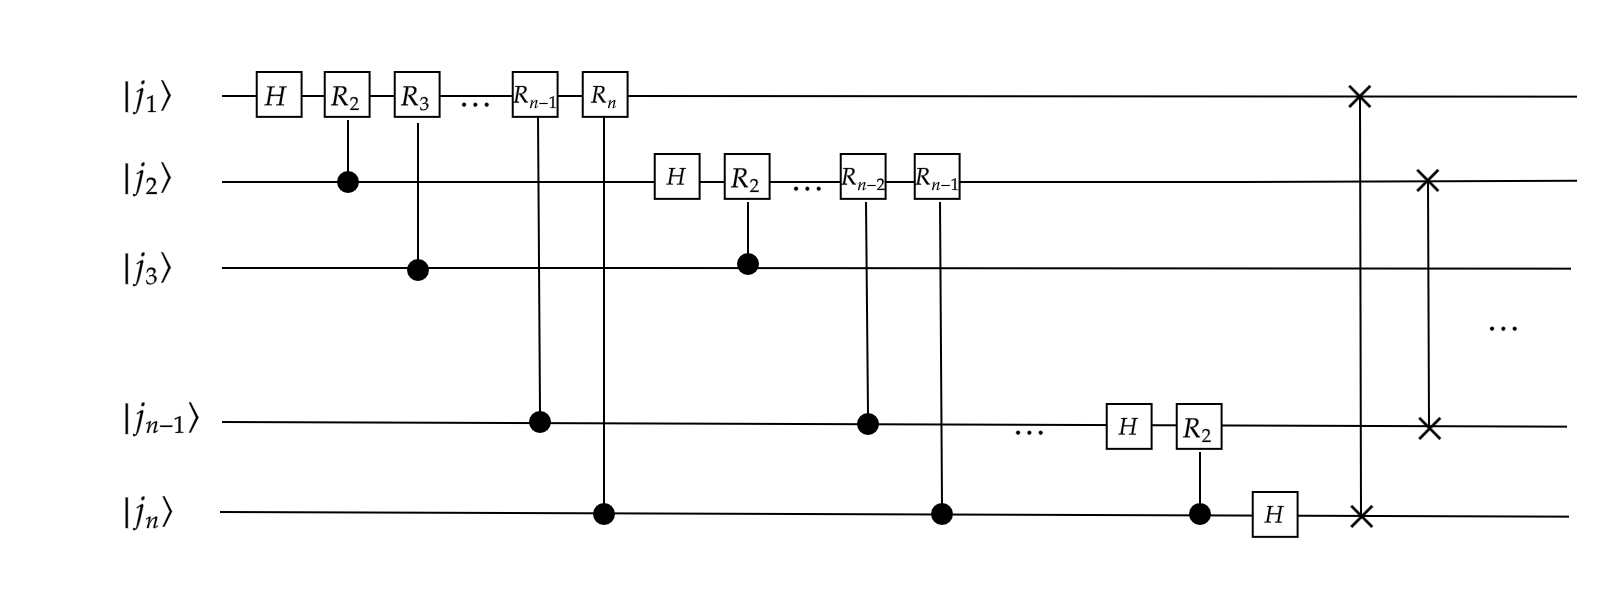

<a id="2.4"></a>
## 2.4. Implementación en Qiskit

En Qiskit podemos usar la siguiente compuerta incluida en el paquete principal:

$$CPhaseGate(\lambda) = \pmatrix{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & {\large e}^{ \large i\lambda } }$$

La cual puede ser aplicada a un objeto `QuantumCircuit` con el método `cp()`.

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def miQFT(n):
    qft_circuit = QuantumCircuit(n)
    for j in reversed(range(n)):                  # considerar el orden invertido de qubits en Qiskit
        qft_circuit.h(j)
        for k in reversed(range(j)):
            qft_circuit.cp(np.pi / 2**(j-k), k, j)
        qft_circuit.barrier()
    for i in range(n//2):
        qft_circuit.swap(i, n-i-1)
    return qft_circuit

In [ ]:
mi_qft_qc4 = miQFT(4)
mi_qft_qc4.draw('mpl')

Qiskit ya cuenta con una clase llamada `QFT` que permite crear este circuito:

In [ ]:
from qiskit.circuit.library import QFT

qft_qc4 = QFT(4, insert_barriers=True)
qft_qc4.draw('mpl')

In [ ]:
qft_qc4.decompose().draw('mpl')

<a id="2.5"></a>
## 2.5. QFT Inversa

En el algoritmo de Shor, y otros algoritmos, se usa la versión inversa de la $QFT$, también denotada por $QFT^{\dagger}$, cuya matriz está dada por:

$$QFT^\dagger =  \frac{1}{\sqrt{N}} \pmatrix{1 & 1 & 1 &1  & \cdots & 1\\ 1 & \omega^{-1} & \omega^{-2} & \omega^{-3} & \cdots& \omega^{-(N-1)} \\ 1 & \omega^{-2} &\omega^{-4} & \omega^{-6}  & \cdots& \omega^{-(2N-2)} \\ 1 & \omega^{-3} & \omega^{-6} & \omega^{-9} & \cdots& \omega^{-(3N-3)} \\ \vdots &  \vdots &  \vdots &  \vdots &  \ddots &  \vdots \\ 1 & \omega^{-(N-1)} & \omega^{-(2N-2)} & \omega^{-(3N-3)} & \cdots& \omega^{-(N-1)(N-1)}}$$

Para implementarla, podemos simplemente indicar que queremos la versión inversa del circuito con el método `inverse()`, o indicar el parámetro `inverse=True` en la clase `QFT`:

In [ ]:
mi_qft_qc4.inverse().draw('mpl')

In [ ]:
qft_qc4 = QFT(4, inverse=True, insert_barriers=True)
qft_qc4.decompose().draw('mpl')

### Discusión sobre la cantidad de compuertas

Para el primer qubit, aplicamos una sola compuerta de Hadamard seguida de $n-1$ compuertas de rotación controlada, lo que suma un total de $n$ compuertas.

Para el segundo qubit, aplicamos una sola compuerta de Hadamard seguida de $n-2$ compuertas de rotación controlada, lo que suma un total de $n-1$ compuertas.

Entonces, en total se requieren $n + (n-1) + \cdots + 1 = \dfrac{n(n+1)}{2}$ compuertas.

Además, se requieren $\dfrac{n}{2}$ compuertas $SWAP$, cada una de las cuales puede implementarse utilizando tres compuertas $CNOT$.

En resumen, se requieren del orden $O(n^2)$ compuertas para aplicar $QFT$ a un sistema de $n$ qubits representado por un vector de tamaño $N=2^n$.

El algoritmo clásico mejor conocido para calcular la Transformada Discreta de Fourier de $2^n$ entradas, como la Transformada Rápida de Fourier (FFT), requiere un orden de $O(n2^n)$, equivalentemente $O(N \log N)$ compuertas. Esto significa que el algoritmo clásico requiere exponencialmente muchas más operaciones para calcular la $DFT$ (cabe destacar que el algoritmo obvio para calcular la $DFT$ requiere ${2}^{2n}$ compuertas). Un algoritmo mejorado presentado [aquí](https://ieeexplore.ieee.org/document/892139) proporciona un circuito para calcular la $QFT$ con $O(n \log n)$ compuertas.

Sin embargo, esto no significa que podamos usar la $QFT$ directamente para acelerar el proceso de cálculo clásico. Hay dos razones para ello: la primera es que no se puede acceder directamente a las amplitudes después de aplicar la $QFT$. La segunda es que podríamos no saber cómo preparar eficientemente el estado de entrada para la $QFT$.

<a id="3"></a>
# 3. Quantum Phase Estimation (QPE)

En esta sección hablaremos de una aplicación de la Transformada Cuántica de Fourier, que nos llevará en el camino hacia el Algoritmo de Shor.

Para una matriz dada $ A $, un vector $ \vec{v} $ distinto de cero se denomina su vector propio (eigenvector) si existe un valor escalar $ \lambda $ llamado valor propio (eigenvalor) que satisface

$$ A \cdot \vec{v} = \lambda \cdot \vec{v} $$

Las matrices unitarias preservan la longitud. Por lo tanto, sus valores propios deben tener una longitud de $1$, por lo que tienen la forma 

$$ \lambda={\large e}^{\large 2 \pi i \phi} $$

para algún $\phi \in [0,1)$.

Nuestro objetivo es, para una matriz unitaria dada $ U $ y su vector propio $ \ket{u} $, estimar la fase $ \phi $ del valor propio correspondiente, es decir $ {\large e}^{\large 2 \pi i \phi} $.

La matriz $ U^k $ es la $ k $-ésima potencia de $ U $.

Dado que tenemos la relación

$$ U \ket{u} = {\large e}^{\large 2 \pi i \phi} \ket{u} $$

entonces podemos observar que 

$$ U^{\large k} \ket{u} = \left( {\large e}^{\large 2 \pi i \phi} \right)^{\large k} \ket{u} = {\large e}^{\large 2 \pi i \phi k} \ket{u} $$

<div class="alert alert-block alert-info">
    <strong>Ejemplo</strong>: Mostrar que $\ket{-}$ y $\ket{+}$ son eigenvectores del operador $X$ con eigenvalores $-1$ y $1$ respectivamente

\begin{align*}
X \ket{-} = X \frac {\ket{0} - \ket{1}} {\sqrt{2}}
& =  \frac {\ket{1} - \ket{0}} {\sqrt{2}}\\
& = -\frac {\ket{0} - \ket{1}} {\sqrt{2}}\\
& = -\ket{-}
\end{align*}


\begin{align*}
X \ket{+} = X \frac {\ket{0} + \ket{1}} {\sqrt{2}}
& =  \frac {\ket{1} + \ket{0}} {\sqrt{2}}\\
& = \frac {\ket{0} + \ket{1}} {\sqrt{2}}\\
& = \ket{+}
\end{align*}

Por lo tanto, $ \ket{-}$ y $\ket{+}$ son vectores propios (o estados propios) del operador $ X $ con los valores propios $-1$ y $1$ respectivamente.

### Operador U-controlado

Sea $ U $ un operador unitario con estado propio $ \ket{\psi} $ y valor propio $ {\large e}^{\large 2\pi i \phi} $ tal que $ U\ket{\psi} = {\large e}^{\large 2{\pi}i{\phi}} \ket{\psi}$.

Comprobamos el efecto del operador $ U $ controlado ($CU$) sobre el qubit de control.

A continuación se muestran los casos en los que el qubit de control está en el estado $ \ket{0} $ ó $ \ket{1} $.

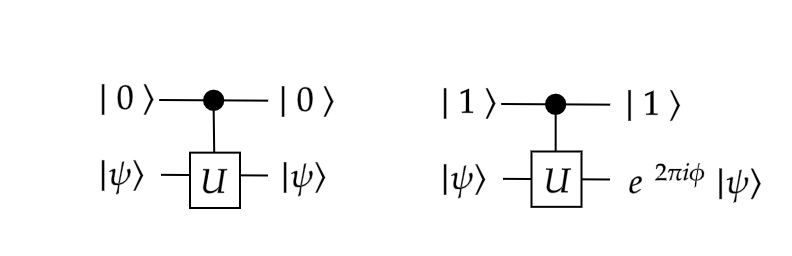

En el primer caso, el operador $ U $ no se aplica ya que el qubit de control está en $ \ket{0} $. Por lo tanto, tenemos:

$$ CU(\ket{0}\ket{\psi}) \rightarrow \ket{0}\ket{\psi} $$

En el segundo caso, el operador $ U $ se aplica al estado $ \ket{\psi} $ ya que el qubit de control está en $ \ket{1} $. Por lo tanto, tenemos:

$$ CU(\ket{1}\ket{\psi}) \rightarrow {\large e}^{\large 2{\pi}i{\phi}}\ket{1}\ket{\psi} $$

El operador $ CU $ coloca una fase de $ {\large e}^{\large 2\pi i \phi} $ delante del estado $ \ket{1} $ cuando el qubit de control está en superposición de los estados $ \ket{0} $ y $ \ket{1} $; es decir,

$$ \begin{array}{rcl}
CU \left( \left( \dfrac{ \ket{0} + \ket{1} }{ \sqrt{2} } \right)  \ket{\psi} \right) & = &  \dfrac{1}{\sqrt{2}} \Bigg( CU \Big( \ket{0}\ket{\psi} + \ket{1}\ket{\psi} \Big) \Bigg) \\
& = & \dfrac{1}{\sqrt{2}} \Big( CU\ket{0}\ket{\psi} + CU \ket{1}\ket{\psi} \Big) \\
& = & \dfrac{1}{\sqrt{2}} \Big( \ket{0} \ket{\psi} + {\large e}^{\large 2{\pi}i{\phi}}\ket{1}\ket{\psi} \Big) \\
& = & \dfrac{1}{\sqrt{2}} \Big( \big( \ket{0} + {\large e}^{\large 2{\pi}i{\phi}}\ket{1} \big) \ket{\psi} \Big) \\
& = & \Bigg( \dfrac{ \ket{0} + {\large e}^{\large 2{\pi}i{\phi}} \ket{1} }{\sqrt{2}} \Bigg) \ket{\psi}
\end{array}$$

Por lo tanto, para un estado arbitrario, tenemos que

$$\alpha \ket{0}\ket{\psi} + \beta \ket{1}\ket{\psi} \xrightarrow{CU} \alpha \ket{0}\ket{ \psi} ~+~ {\large e}^{\large 2{\pi}i{\phi}} \beta \ket{1}\ket{\psi} = \left(\alpha \ket{0} ~+~ {\large e}^{\large 2{ \pi}i{\phi}} \beta \ket{1}\right)\ket{\psi}$$

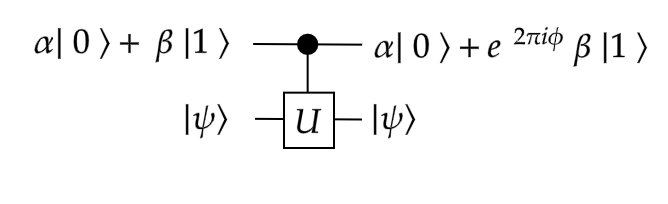

### Estimación de valores propios del operador $X$

Recordemos que $ \ket{+} $ y $ \ket{-} $ son los estados propios del operador $X$. Si aplicamos el operador $ CX $ al siguiente estado cuántico donde $ \ket{\psi} $ es $ \ket{+} $ o $ \ket{-} $, entonces, tenemos que:

\begin{align*}
CX \left(\frac {\ket{0} + \ket{1}} {\sqrt{2}} \ket{\psi} \right) \rightarrow \frac {\ket{0} + (-1)^x \ket{1}} {\sqrt{2}}\ket{\psi}
\end{align*}

Ahora, para determinar $ x $, se aplica una compuerta Hadamard, el valor dependerá del resultado.

Si el resultado es $ \ket{0} $, entonces $ x = 0 $ y si el resultado es $ \ket{1} $, entonces $ x = 1 $.

Notemos que este es un caso especial del problema de estimación de fase en el que intentamos estimar los valores propios del operador $ X $. En este caso, $ \phi $ es $ 0 $ o $ \frac{1}{2} $, que se puede determinar mediante un operador Hadamard. A continuación, veremos cómo lograr esto en general.

<a id="3.1"></a>
## 3.1. Algoritmo de QPE

Nuestra matriz unitaria $ U $ y el estado $\ket{\psi} $ es el vector propio dado.

Usamos dos registros.

- El primer registro contiene $ t $ qubits que están en el estado $ \ket{0} $.
  - $ t $ depende de la cantidad de dígitos de precisión y la probabilidad de éxito al estimar $ \phi $. Más adelante veremos los detalles de $ t $.
  - Nombramos estos qubits como $ q_1,q_2,\ldots,q_t$.
    
- El segundo registro almacena $ \ket{\psi} $.

Aplicamos una serie de operadores controlados $ U^{2^{\huge j}} $ para $ j \in \{0,\ldots,t-1 \} $.

### Estado inicial

Comenzamos en el estado 
$$\underbrace{\left(\ket{0}\otimes\cdots\otimes\ket{0}\right)}_{1er~registro}\underbrace{\ket{\psi}}_{2do~registro}$$

### Operadores Hadamard

Primero aplicamos una compuerta Hadamard a cada qubit en el primer registro.

Entonces, el nuevo estado cuántico es

$$ \underbrace{\dfrac {1}{2^{t/2}} \big( \left(\ket{0}+\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\ket{1}\right) \big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

### Operadores $U^{2^{\huge j}}$ controlados

Aplicamos el operador $ U^{2^{\huge j}} $ al segundo registro, controlado por $ q_{t-j} $ en el primer registro, donde $j \in \{ 0,\ldots, t-1 \}$.

Como se explicó anteriormente, después de aplicar cada $ CU^{2^{\huge j}} $, la fase relativa del qubit de control se actualizará en consecuencia.

- **$j=0$:** Aplicamos $CU^{2^{\huge 0}}$ al segundo registro, donde $q_t$ es el qubit de control. Entonces, el estado es

$$ \underbrace{\dfrac {1}{2^{t/2}} \Big( \left(\ket{0}+\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^0}}\ket{1}\right) \Big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

- **$j=1$:** Aplica $CU^{2^{\huge 1}}$ al segundo registro, donde $ q_{t-1} $ es el qubit de control. Entonces, el estado es

$$ \underbrace{\dfrac {1}{2^{t/2}} \Big( \left(\ket{0}+\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^1}}\ket{1}\right) \otimes \left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^0}}\ket{1}\right) \Big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

$ ~~~~ \vdots $

- **$j=t-1$:** Aplica $CU^{2^{\huge t-1}}$ al segundo registro, donde $q_1$ es el qubit de control. Entonces, el estado es

$$ \underbrace{\dfrac {1}{2^{t/2}} \Big( \left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^{t-1}}}\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^1}}\ket{1}\right) \otimes \left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^0}}\ket{1}\right) \Big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

### QFT inversa

Hemos terminado con el segundo registro y podemos descartarlo.

El estado del primer registro es

$$\ket{u} = \dfrac {1}{2^{t/2}} \underbrace{\left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^{ t-1}}}\ket{1}\right)}_{q_1} \otimes \cdots \otimes \underbrace{\left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^1}}\ket{1}\right)}_{q_{t-1}} \otimes \underbrace{\left(\ket{0}+\mathbf{{\large e}^{\large 2{\pi}i\phi 2^0}}\ket{1}\right)}_{q_t}$$

De hecho, este estado es el mismo que el estado obtenido por $ QFT\ket{j} $:

$$ QFT\ket{j} = \dfrac{1}{\sqrt{N}}
 \underbrace{ \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_n ]} } \ket{1} \right) }_{q_1} \otimes
 \underbrace{ \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_{n-1}j_n ]} } \ket{1} \right) }_{q_{2} } \otimes
 \cdots \otimes
 \underbrace{ \left(\ket{0}+{\large e}^{\large 2\pi i \mathbf{[ 0.j_1\cdots j_n]}} \ket{1} \right) }_{q_n}
$$

donde $ N = 2^n $ y $ \ket{j} \in \{ \ket{0},\ldots,\ket{N-1} \} $.

La única diferencia es que $ j $ es un entero y, por lo tanto, el componente de fracción binaria de una fase relativa se almacena en $ n $ bits. Por otro lado, $ \phi $ puede utilizar una cantidad arbitraria de bits o tener una cantidad infinita de dígitos.

Para demostrar que $ \ket{u} $ y $ QFT\ket{j} $ son (casi) lo mismo, reformateamos las fases relativas en $ \ket{u} $.

Tanto $ t $ como $ n $ son el número de qubits. Podemos usarlos indistintamente.

El valor $ \phi \in [0,1) $ se representa en binario como $ [ 0.\phi_1 \phi_2 \cdots \phi_n \phi_{n+1} \cdots ] $.

Al multiplicar $\phi$ por las potencias de $2$, se desplaza el punto decimal hacia la derecha:
- $ \phi 2^0 = [ 0 \mathbf{.}\phi_1 \phi_2 \cdots \phi_n \phi_{n+1} \cdots ] $
- $ \phi 2^1 = [\phi_1 \mathbf{.} \phi_2 \cdots \phi_n \phi_{n+1} \cdots ] $
<br> $ ~~~ \vdots $
- $ \phi 2^{n-1} = [ \phi_1 \phi_2 \cdots \phi_{n-1} \mathbf{.} \phi_n \phi_{n+1} \cdots ] $

Estos valores están en el exponente de $ {\large e} $ y en la multiplicación por $ 2\pi i$. Por lo tanto, podemos eliminar las partes enteras.

$$ \ket{u} = \dfrac {1}{\sqrt{N}} \underbrace{\left(\ket{0}+{\large e}^{\large 2{\pi}i  \mathbf{[0.\phi_n\cdots]} }\ket{1} \right) }_{q_1} \otimes \underbrace{\left(\ket{0}+{\large e}^{\large 2{\pi}i \mathbf{[0.\phi_{n-1}\phi_n\cdots]} }\ket{1}\right) }_{q_2} \otimes \cdots \otimes \underbrace{\left(\ket{0}+{\large e}^{\large 2{\pi}i \mathbf{[0.\phi_1 \cdots \phi_n\cdots]} }\ket{1} \right)
}_{q_{n-1}} $$

<div class="alert alert-block alert-success">
<strong>Recordatorio</strong>: La exponencial elevada a $2\pi i$

Tenemos que

$${\large e}^{\large 2\pi i} = 1$$

Sucede lo mismo para los múltiplos de $2\pi i$, es decir,

$${\large e}^{\large m2\pi i} = 1^{\large m}=1$$


Está claro que 
$$ QFT^\dagger QFT \ket{j} = \ket{j} $$

Por lo tanto, para estimar $ \phi $, podemos simplemente aplicar $ QFT^\dagger $ a $ \ket{u} $ y luego medir todos los qubits (en el primer registro).

### Circuito

A continuación se muestra el circuito completo del algoritmo de estimación de fase cuántica.

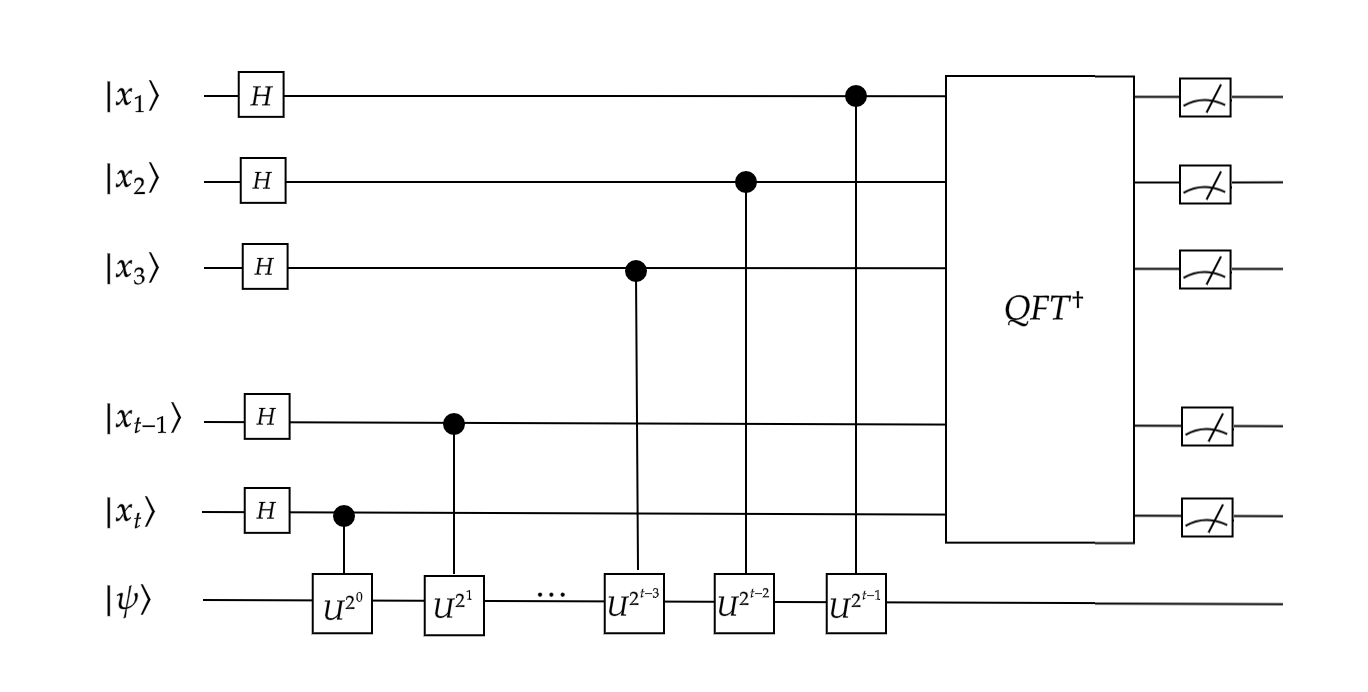

El circuito utiliza $ O(t^2) $ compuertas (operaciones) con $ t $ llamadas de $ CU^{2^{\huge j}} $.

### Salidas

Si hay $ \ket{j} \in \{ \ket{0},\ldots,\ket{N-1} \} $ que satisface que $ j = N \cdot \phi $, entonces el resultado es $ \ket{j} $ con probabilidad $1$ y por lo tanto 

$$ \phi = \dfrac{j}{N} $$

De lo contrario, $ N \cdot \phi $ está entre los números enteros $ j $ y $ j+1 $ ($ 0 \leq j < j+1 \leq N-1 $), entonces el resultado será $ \ket{j} $ o $ \ket{j+1} $ con alta probabilidad. En cualquier caso, tendremos una estimación de $\phi$:

$$ \dfrac{j}{N} < \phi < \dfrac{j+1}{N} $$

Para tener una mejor estimación, se pueden usar más qubits en el primer registro, es decir, eligiendo 

$$ t = m + \left \lceil \log \left (2 + \frac{1}{2\varepsilon} \right) \right \rceil $$

donde $\log$ es el logarítmo base $2$, entonces podemos aproximar $\phi$ con una precisión de $ m $ bits con una probabilidad de éxito de al menos $1 - \varepsilon$.

Si tomamos cualquier estado arbitrario en lugar de $\ket{\psi}$, obtenemos una aproximación a uno de los valores propios con cierta probabilidad. La razón es que podemos expresar cualquier estado cuántico como una combinación lineal de los vectores propios.

Como sabemos cómo implementar $QFT^{\dagger}$ de manera eficiente, también hemos obtenido un algoritmo eficiente para la estimación de fase. Muchos problemas interesantes se reducen al problema de estimación de fase.

<a id="3.2"></a>
## 3.2. Implementación en Qiskit

### Operador unitario para un solo qubit control

Consideremos un operador unitario de un solo qubit $ U $ que tiene un vector propio $ \ket{1} $ y un valor propio $ {\large e}^{\large 2\pi i \phi} $ donde $\phi = \dfrac{5}{16} $.

La compuerta `CPhaseGate(2*pi*5/16)` de Qiskit es una buena candidata de $ U $ ya que podemos especificar los exponentes fácilmente.

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def CU(circuit, power, qcontrol, target):

    circuit.cp((2*np.pi * 5/16) * (2**power), qcontrol, target)

Ahora elijamos $t=4$ e implementemos el circuito de estimación de fase para estimar $\phi$.

Utilicemos el método `QFT` de Qiskit, para el uso de la $ QFT^\dagger $.

Tengamos en cuenta que se debería obtener un resultado exacto ya que $t=4$ es lo suficientemente preciso para este caso.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 4                                     # número de qubits en el registro de control
n = 1                                     # número de qubits en el registro que almacena el eigenvector

control = QuantumRegister(t, 'j')         # crear t qubits de control

target = QuantumRegister(n, 'psi')        # crear n qubits objetivo

circuit = QuantumCircuit(control, target) # crear el circuito

circuit.h(control)                        # aplicar Hadamard a los qubits del primer registro (control)

circuit.x(target)                         # colocar el segundo registro (target) en el estado |1>

                                          # aplicar los operadores CU^(2^j)
for j in reversed(range(t)):
    CU(circuit, j, control[j], target)    # nota que el orden es inverso porque se trata de Qiskit

                                          # agregar la QFT inversa
circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)


cr = ClassicalRegister(t, 'res')          # agregar mediciones (al registro 't' o 'control')
circuit.add_register(cr)
circuit.measure(control, cr)


display(circuit.draw('mpl'))              # mostrar el circuito

In [ ]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

job_sampler = sampler.run([circuit])

job_sampler.result()

print(job_sampler.result()[0].data.res.get_counts())

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram([job_sampler.result()[0].data.res.get_counts()], legend=["Resultado de QPE (valor de j)"])

Observamos la salida $0101_2 = 5_{10}$, entonces la fase es:

$$\phi=\frac{j}{N}=\frac{5}{2^4}=\frac{5}{16}$$

¿Qué pasa si usamos solamente $t=3$?

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 3          # <-- cambio               # número de qubits en el registro de control
n = 1                                     # número de qubits en el registro que almacena el eigenvector

control = QuantumRegister(t, 'j')         # crear t qubits de control

target = QuantumRegister(n, 'psi')        # crear n qubits objetivo

circuit = QuantumCircuit(control, target) # crear el circuito

circuit.h(control)                        # aplicar Hadamard a los qubits del primer registro (control)

circuit.x(target)                         # colocar el segundo registro (target) en el estado |1>

                                          # aplicar los operadores CU^(2^j)
for j in reversed(range(t)):
    CU(circuit, j, control[j], target)    # nota que se itera en orden inverso porque se trata de Qiskit

                                          # agregar la QFT inversa
circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)


cr = ClassicalRegister(t, 'res')          # agregar mediciones (al registro 't' o 'control')
circuit.add_register(cr)
circuit.measure(control, cr)


display(circuit.draw('mpl'))              # mostrar el circuito



sampler = StatevectorSampler()

job_sampler = sampler.run([circuit])

job_sampler.result()

print(job_sampler.result()[0].data.res.get_counts())

plot_histogram([job_sampler.result()[0].data.res.get_counts()], legend=["Resultado de QPE (valor de j)"])

Las salidas más frecuentes son `010` y `011`, que son $2$ y $3$ en decimal respectivamente, entonces tenemos que

$$ \dfrac{2}{8} <  \phi < \dfrac{3}{8} \; \Rightarrow \; \dfrac{4}{16} <  \phi < \dfrac{6}{16}  $$

Ahora trabajemos con $\phi=0.685$.

Es necesario actualizar $CU$:

In [ ]:
def CU(circuit, power, qcontrol, target):

    circuit.cp((2*np.pi * 0.685) * (2**power), qcontrol, target)

¿Cuál valor de $t$ es el que funcionará en este caso?

In [ ]:
for t in range(1, 14):
    
    n = 1                                       # número de qubits en el registro que almacena el eigenvector
    
    control = QuantumRegister(t, 'j')           # crear t qubits de control
    
    target = QuantumRegister(n, 'psi')          # crear n qubits objetivo
    
    circuit = QuantumCircuit(control, target)   # crear el circuito
    
    circuit.h(control)                          # aplicar Hadamard a los qubits del primer registro (control)
    
    circuit.x(target)                           # colocar el segundo resistro (target) en el estado |1>
    
                                                # aplicar los operadores CU^(2^j)
    for j in reversed(range(t)):
        CU(circuit, j, control[j], target)      # nota que se itera en orden inverso porque se trata de Qiskit
    
                                                # agregar la QFT inversa
    circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)
    
    cr = ClassicalRegister(t, 'res')            # agregar mediciones
    circuit.add_register(cr)
    circuit.measure(control, cr)
    
    sampler = StatevectorSampler()
    
    job_sampler = sampler.run([circuit])
    
    job_sampler.result()

    data = job_sampler.result()[0].data.res.get_counts()

    max_key = max(data, key=data.get)          # encontrar la llave (número medido) con el valor máximo
    max_value = data[max_key]

    freq = int(max_key, 2)                     
    
    print(t, ":\t phi =", freq/2**t)

### Operador unitario para dos qubits control

Al utilizar `MCPhaseGate` que es una compuerta multicontrolada, podemos obtener un operador para dos qubits control.

Fijamos $ \phi = 0.31415926535 $. Por lo tanto, $ \ket{11} $ es un vector propio con valor propio $ \phi $.

In [ ]:
def CU2(circuit, power, control, target):

    circuit.mcp((2*np.pi * 0.31415926535) * (2**power), control, target)

In [ ]:
for t in range(1, 17):
    
    n = 2                                       # número de qubits en el registro que almacena el eigenvector
    
    control = QuantumRegister(t, 'j')           # crear t qubits de control
    
    target = QuantumRegister(n, 'psi')          # crear n qubits objetivo
    
    circuit = QuantumCircuit(control, target)   # crear el circuito
    
    circuit.h(control)                          # aplicar Hadamard a los qubits del primer registro (control)
    
    circuit.x(target)                           # colocar el segundo resistro (target) en el estado |1>
    
                                                # aplicar los operadores CU^(2^j)
    for j in reversed(range(t)):
        CU2(circuit, j, target, control[j])     # nota que se itera en orden inverso porque se trata de Qiskit
                                                # 'mcp' espera múltiples controles, por eso se intercambia el parámetro
                                                # 'target' (que tiene dos qubits) con el parámetro 'control[j]' (que solo es un qubit)
    
                                                # agregar la QFT inversa
    circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)
    
    cr = ClassicalRegister(t, 'res')            # agregar mediciones
    circuit.add_register(cr)
    circuit.measure(control, cr)
    
    sampler = StatevectorSampler()
    
    job_sampler = sampler.run([circuit])
    
    job_sampler.result()

    data = job_sampler.result()[0].data.res.get_counts()

    max_key = max(data, key=data.get)          # encontrar la llave (número medido) con el valor máximo
    max_value = data[max_key]

    freq = int(max_key, 2)                     # convertir la llave de binario a decimal
    
    print(t, ":\t phi =", freq/2**t)

<a id="4"></a>
# 4. Práctica 6

La Tarea deberá ser entregada en un Jupyter notebook, debe ser uno nuevo (no se puede usar este), el archivo debe ser subido al Google Classroom.

Lee primero todas las instrucciones.

1. Implementa "a mano" la $QFT$ inversa:
   1. Esribe el código completo de la Transformada Cuántica de Fourier **Inversa** usando Qiskit.
      1. Crea una función llamada `miQFTInv(n)`, que reciba el número de qubits (`n`).
      2. Usa el orden de Qiskit (revisa el contenido de este Lab6).
      3. No puedes usar la clase `QFT` de Qiskit para crear la función `miQFTInv(n)`.
      4. Debe regresar un objeto de tipo `QuantumCircuit`.
   2. Dibuja el circuito correspondiente a la $QFT$ inversa para `n=10`.
      1. Usa la función que escribiste: `miQFTInv(n)`.
   3. Haz otra función que realice la verificación de tu función `miQFTInv(n)` para todos los estados posibles **para cualquier `n`**. Esta segunda función debe hacer lo siguiente:
      1. Internamente debe generar todos los posibles estados. Si por ejemplo recibe el parámetro `n=4`, entonces deberá generar $16$ estados iniciales. Usa un ciclo para recorrer todas las posibilidades.
      2. Por cada iteración:
         1. Se debe crear un circuito para cada uno de los posibles estados. Es decir, agrega compuertas $X$ cuando haya un $1$ en el estado. Recuerda que estás trabajando con el orden de Qiskit.
         2. Aplica tu función `miQFTInv(n)`.
         3. Concatena (compone) en el mismo circuito la $QFT$ *normal*, aquí si puedes usar la clase de Qiskit `QFT`.
         4. Agrega mediciones a todos los qubits.
         5. Realiza la simulación del circuito.
            - Se debe hacer una simulación por cada estado posible.
            - **No** muestres un histograma para cada caso.
            - Muestra que la salida del circuito para cada caso es exactamente el mismo estado que el de entrada.
            - Usa $5000$ shots.
            - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
      3. Ejecuta esta segunda función con `n=4`. Deberá generar $16$ resultados.
</br>

2. Escribe el código para estimar la fase $\phi=0.15625$.
    1. Escribe la función para $CU$.
       - Revisa los ejemplso de este Lab6.
    2. Usa todo el código necesario pára determinar la fase.
    3. Usa tu función `miQFTInv(n)` que escribiste para el ejercicio anterior.
       - No uses la clase `QFT` de Qiskit.
    5. Determina con precisión el valor del tamaño del registro $t$.
       1. Calcula numéricamente este valor. Usa $m=4$ y $\varepsilon=0.1$.
       2. Valida con un ciclo si el valor calculado de $t$ es correcto o si con otro valor se puede calcular $\phi$ con toda precisión.
       3. Escribe en una celda de markdown el valor correcto de $t$.
</br>

##### **Nota**: Tarea individual.